# <center><font color=DarkRed> Partie 1: Analyse exploratoire et préparation des données</font></center><br>

<center>La société <font color=DarkBlue><b>Fly Me</b></font>, est une agence qui propose des voyages clé en main pour les particuliers ou les professionnels.</center>

<hr>

**<center><font color=DarkRed>La mission :</font></center>**
En tant qu'Ingénieur IA nous devons **construire un MVP** qui aidera les employés de Fly Me à réserver facilement un billet d’avion pour leurs vacances. ce MVP prendra la forme d'une Web APP.

Dans un premier temps nous devons construire un chatbot pour que les collaborateurs internes puissent facilement réserver un billet d’avion pour leurs prochaines vacances.

La V1 devra pouvoir identifier dans la demande de l’utilisateur les cinq éléments suivants :

- Ville de départ;
- Ville de destination;
- Date aller souhaitée du vol;
- Date retour souhaitée du vol;
- Budget maximum pour le prix total des billets.

Mon rôle est de **créer une Web APP** pour développer et exposer le chatbot.

<font color=DarkBlue>**Par conséquent, je doit fournir**</font> : 
- **L'application web du chatbot** dévelopée à l'aide de la version Python du Microsoft Bot Builder SDK
- **L'outil de suivi et d'analyse de l'activité du chatbot**, en production à l'aide **d'Azure application insight**
- **Une présentation de la méthodologie sur le pillotage et la performance en production** 
- **Les scripts développés**, stockés dans un système de gestion de version **Git**

<hr>

La première étape consiste en l'**importation des librairies <code>Python</code>** nécessaires à l'analyse dans le <code>**Jupyter Notebook**</code> : <br>
- <code>**NumPy**</code>, 
- <code>**Pandas**</code>, 
- <code>**Matplotlib**</code>, 
- <code>**seaborn**</code>


## Importation des librairies

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## <center><font color=darkRed>1. - Présentation générale des jeux de données</font></center>

**Microsoft Frames** est un ensemble de données de dialogue multi-domaines créé par Microsoft Research AI. Il contient plus de **1369 conversations annotées entre un utilisateur et un assistant virtuel**. Les conversations couvrent 10 domaines, tels que **la réservation de vol, la réservation d'hôtel, la réservation de taxi, la recherche d'informations, etc**.

Chaque conversation est constituée d'une série d'interaction entre l'utilisateur et l'assistant virtuel. Chaque interaction est appelée un **turn**. Chaque **turn** contient un ou plusieurs énoncés de l'utilisateur et la réponse correspondante de l'assistant virtuel.

En plus des transcriptions des turn, chaque turn contient également des annotations des intentions de l'utilisateur et des actions de l'assistant virtuel, ainsi que des annotations pour les emplacements, les dates, les heures, les prix et d'autres informations pertinentes.

Le jeu de données Frames est utilisé pour l'entraînement et l'évaluation de **systèmes de dialogue conversationnels** et pour la recherche dans le domaine de la **compréhension de langage naturel**.

### <center><font color=darkBlue>1.1 - Chargement des données</font></center>

In [199]:
data = pd.io.json.read_json('../data/frames/frames.json')
data.shape

(1369, 5)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1369 non-null   object
 1   turns      1369 non-null   object
 2   wizard_id  1369 non-null   object
 3   id         1369 non-null   object
 4   labels     1369 non-null   object
dtypes: object(5)
memory usage: 53.6+ KB


In [201]:
rating = pd.json_normalize(data['labels'])
rating.head()

,userSurveyRating,wizardSurveyTaskSuccessful
0,4.0,True
1,3.0,True
2,2.0,False
3,5.0,True
4,5.0,True


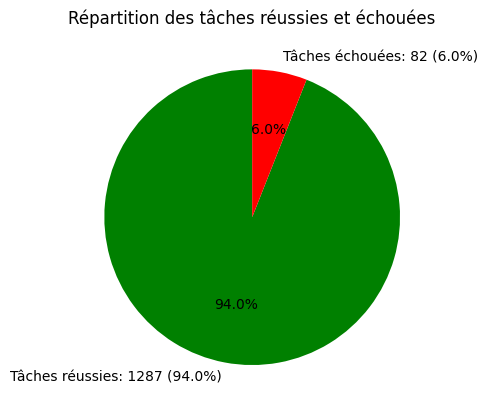

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer le nombre de tâches réussies et échouées
success_count = rating['wizardSurveyTaskSuccessful'].value_counts()[True]
failure_count = rating['wizardSurveyTaskSuccessful'].value_counts()[False]

# Créer un graphique en secteurs
labels = ['Tâches réussies', 'Tâches échouées']
sizes = [success_count, failure_count]
colors = ['green', 'red']

# Calculer les pourcentages et les nombres de tâches réussies et échouées
total_count = success_count + failure_count
success_percentage = success_count / total_count * 100
failure_percentage = failure_count / total_count * 100
success_label = f"Tâches réussies: {success_count} ({success_percentage:.1f}%)"
failure_label = f"Tâches échouées: {failure_count} ({failure_percentage:.1f}%)"

# Afficher le graphique en secteurs avec les nombres de tâches réussies et échouées
plt.pie(sizes, labels=[success_label, failure_label], colors=colors, autopct='%1.1f%%', startangle=90)

# Ajouter un titre
plt.title('Répartition des tâches réussies et échouées')

# Afficher le graphique
plt.show()


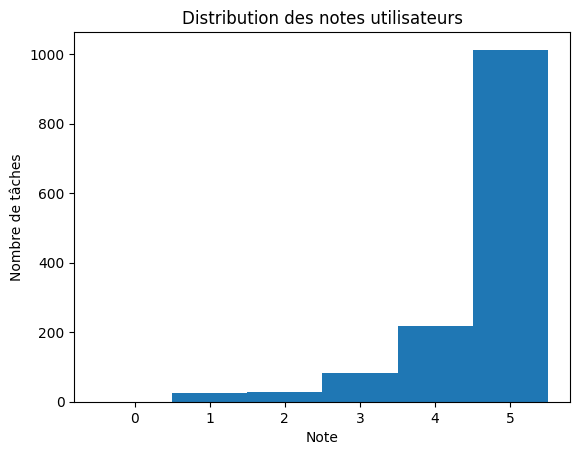

La satisfaction moyenne des utilisateurs est de :  4.57


In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un histogramme
bins = [i - 0.5 for i in range(7)]
plt.hist(rating['userSurveyRating'], bins=bins)

# Ajouter des titres et des étiquettes d'axes
plt.title('Distribution des notes utilisateurs')
plt.xlabel('Note')
plt.ylabel('Nombre de tâches')

# Afficher le graphique
plt.show()

print('La satisfaction moyenne des utilisateurs est de : ', round(rating['userSurveyRating'].mean(), 2))

In [204]:
turns_list = data['turns'].to_list()

In [205]:
list_dialogues = []

for turn in turns_list:
    list_dialogues.append(len(turn))

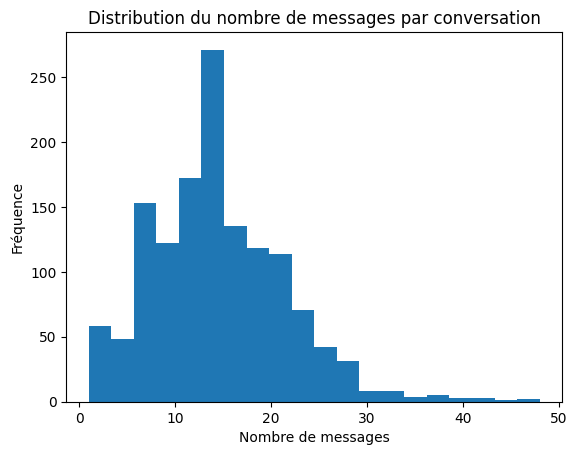

In [233]:
# Afficher l'histogramme
plt.hist(list_dialogues, bins=20)

# Ajouter un titre et des étiquettes d'axes
plt.title('Distribution du nombre de messages par conversation')
plt.xlabel('Nombre de messages')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.show()

In [207]:
turns_list[0]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

### <center><font color=darkBlue>1.2 - Parsing des données pour LUIS</font></center>

Les clés qui nous intéresse dans le cadre de ce MVP sont :

- **or_city** (Ville de départ)
- **dst_city** (Ville de destination)
- **str_date** (Date aller souhaitée du vol)
- **end_date** (Date retour souhaitée du vol)
- **budget** (Budget maximum pour le prix total des billets)

In [208]:
def parse_data(df_data):
    
    #création du dataframe renvoyé
    col_names =  ['text', 'intent', 'or_city', 'dst_city', 'str_date', 'end_date', 'budget']
    data  = pd.DataFrame(columns = col_names)
    
    #parsing des données
    for i in range(len(df_data)):

        text=""
        intent=""
        or_city=""
        dst_city=""
        str_date=""
        end_date=""
        budget=""

        #récupération du texte du message
        text=df_data['turns'][i][0]['text']

        #cas où il y a une intention spécifiée
        if(len(df_data['turns'][i][0]['labels']['acts'])!=0):

            #intention de type Greeting
            if df_data['turns'][i][0]['labels']['acts'][0]['name']=='greeting':
                intent='greeting'

            #intention de type Intent
            for act in df_data['turns'][i][0]['labels']['acts']:
                args = act.get('args', [])
                if args and args[0].get('key') == 'intent':
                    intent = args[0].get('val')
                    break
     
    
            # récupération des informations du message (cas1)
            if len(df_data['turns'][i][0]['labels']['acts']) > 1:
                args = df_data['turns'][i][0]['labels']['acts'][1]['args']
                for arg in args:
                    key = arg['key']
                    val = arg['val']
                    if key == "or_city":
                        or_city = val
                    elif key == "dst_city":
                        dst_city = val
                    elif key == "str_date":
                        str_date = val
                    elif key == "end_date":
                        end_date = val
                    elif key == "budget":
                        budget = val
            
            #récupération des informations du message (cas2)
            else:
                acts = df_data['turns'][i][0]['labels']['acts']
                act = acts[1] if len(acts) > 1 else acts[0]
                for j in range(len(act['args'])):
                    key = act['args'][j]['key']
                    val = act['args'][j]['val']
                    if key == 'or_city':
                        or_city = val
                    elif key == 'dst_city':
                        dst_city = val
                    elif key == 'str_date':
                        str_date = val
                    elif key == 'end_date':
                        end_date = val
                    elif key == 'budget':
                        budget = val


        #cas où il n'y a pas d'intention spécifiée
        else:
            intent="none"

        #remplissage du dataframe avec les informations récupérées
        data.loc[i] = [text, intent, or_city, dst_city, str_date, end_date, budget]

    return data

In [209]:
data_parse = parse_data(data)
data_parse

,text,intent,or_city,dst_city,str_date,end_date,budget
0,I'd like to book a trip to Atlantis from Capri...,book,Caprica,Atlantis,"Saturday, August 13, 2016",,1700
1,"Hello, I am looking to book a vacation from Go...",book,Gotham City,Mos Eisley,,,2100
2,Hello there i am looking to go on a vacation w...,book,,Gotham City,,,
3,"Hi I'd like to go to Caprica from Busan, betwe...",book,Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",
4,"Hello, I am looking to book a trip for 2 adult...",book,Kochi,Denver,,,"$21,300"
...,...,...,...,...,...,...,...
1364,Hi I've got 9 days free and I'm looking for a ...,book,,,,,
1365,I need to get to Fortaleza on September 8th or...,book,,Fortaleza,September 8th,,
1366,We're finally going on vacation isn't that ama...,book,,,,,15600
1367,"Hi there, I'm looking for a place to get away ...",book,,,,,


In [210]:
data_parse['intent'].unique()

array(['book', '', 'greeting', 'none'], dtype=object)

In [211]:
# Vérification des données aberrantes
print(data_parse.describe(include='all'))

        text intent or_city dst_city str_date end_date budget
count   1369   1369    1369     1369     1369     1369   1369
unique  1329      4     243      236      191      139    107
top       hi   book                                          
freq      10   1134     681      604     1035     1179   1162


In [229]:
data_parse['intent'].value_counts()

book        1134
greeting     141
              91
none           3
Name: intent, dtype: int64

## <center><font color=darkRed> 2. - Nettoyage des données</font></center>

In [212]:
def clean_data(df):
    for col in df.columns:
        df[col] = df[col].astype(str).str.replace('-1', '').str.replace('th', '').str.replace('\$', '').str.replace('USD', '').str.replace('dollar', '').str.replace('dollars', '', regex=True)
    return df

In [213]:
data_parse = clean_data(data_parse)
data_parse

/var/folders/7p/szf47gg11631mfrf4f_26z840000gn/T/ipykernel_93640/4043031228.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].astype(str).str.replace('-1', '').str.replace('th', '').str.replace('\$', '').str.replace('USD', '').str.replace('dollar', '').str.replace('dollars', '', regex=True)


,text,intent,or_city,dst_city,str_date,end_date,budget
0,I'd like to book a trip to Atlantis from Capri...,book,Caprica,Atlantis,"Saturday, August 13, 2016",,1700
1,"Hello, I am looking to book a vacation from Go...",book,Goam City,Mos Eisley,,,2100
2,Hello ere i am looking to go on a vacation wi ...,book,,Goam City,,,
3,"Hi I'd like to go to Caprica from Busan, betwe...",book,Busan,Caprica,"Sunday August 21, 2016","Wednesday August 31, 2016",
4,"Hello, I am looking to book a trip for 2 adult...",book,Kochi,Denver,,,"21,300"
...,...,...,...,...,...,...,...
1364,Hi I've got 9 days free and I'm looking for a ...,book,,,,,
1365,I need to get to Fortaleza on September 8 or s...,book,,Fortaleza,September 8,,
1366,We're finally going on vacation isn't at amazi...,book,,,,,15600
1367,"Hi ere, I'm looking for a place to get away wi...",book,,,,,


## <center><font color=darkRed> 3. - Analyse exploratoire des données</font></center>

In [214]:
df_data = data_parse.copy()

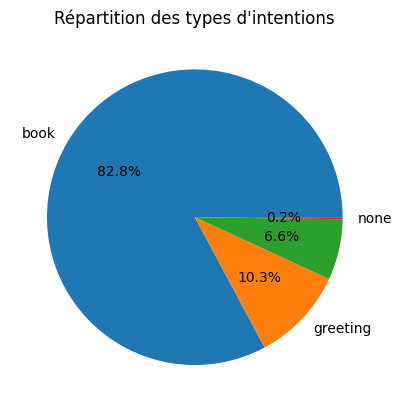

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Compter les types de demandes de réservation
intent_counts = df_data['intent'].value_counts()

# Créer le graphique à secteurs
plt.pie(intent_counts.values, labels=intent_counts.index, autopct='%1.1f%%')

# Ajouter un titre
plt.title("Répartition des types d'intentions")

# Afficher le graphique
plt.show()

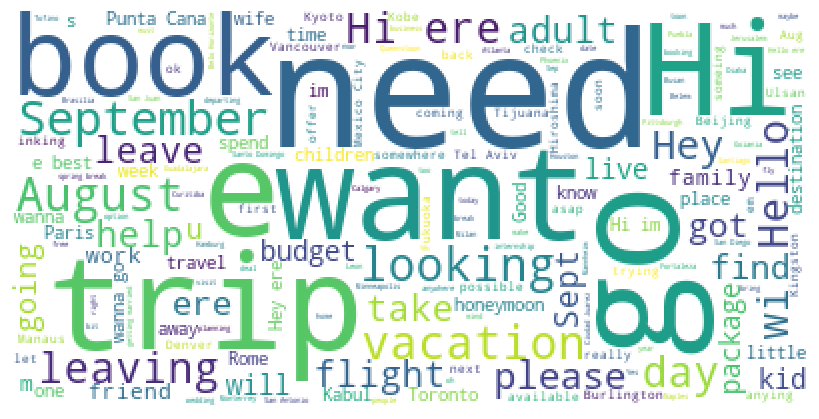

In [216]:
# Importer les bibliothèques nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les textes en un seul string
text = ' '.join(df_data['text'])

# Créer un objet WordCloud
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

# Afficher le wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## <center><font color=darkRed>3 - Sauvegarde des données</font></center>

In [217]:
data_parse.to_csv("../data/data_parse.csv", index=False)